In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
titanic = pd.read_csv(r'C:\Users\bejao\OneDrive\data\titanic-train.csv')
# titanic = "file:///mnt/c/Users/bejao/OneDrive/data/titanic-train.csv"
titanic = pd.read_csv(titanic, index_col=0)
# titanic = pd.read_csv(titanic, index_col=[0, 3])

titanic.isna().sum()
# titanic.dropna()
# titanic=titanic.drop(labels=['Name', 'Ticket', 'Fare', 'Cabin'], axis=1)
# sibsp (Sibling and Spouse) : le nb de membres de la famille du passage du type : frères/soeurs/demi-frère-soeur ou époux(se)
# parch (Parent or Child) : le nb de membres de la famille du passage du type père, mère, fils, fille, beau-fils, belle-fille
# titanic = titanic.fillna(titanic.Age.mean())
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [15]:
# titanic.shape #  1309 rows x 6 columns
# titanic.info()
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


<AxesSubplot:ylabel='Frequency'>

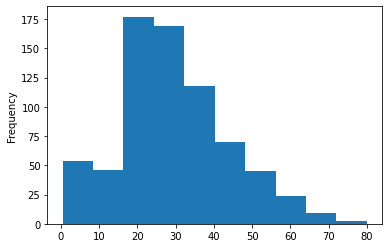

In [18]:
titanic.Age.plot.hist()

In [19]:
titanic.describe(include=['O'])

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


<AxesSubplot:>

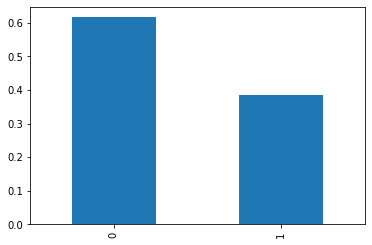

In [28]:
# titanic.Embarked.unique()
titanic.Survived.value_counts(normalize=True).plot.bar() # pie()

In [33]:
# titanic['SibSp'].value_counts()
# titanic['Parch'].value_counts()
# titanic['Sex'].value_counts(normalize=True)
# titanic['Pclass'].value_counts(normalize=True)
# titanic['Survived'].value_counts(normalize=True)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [8]:
# pd.crosstab(titanic['Survived'], titanic['Sex'], normalize=True, margins=True) * 100
# pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize=True, margins=True).T * 100
titanic.groupby(['Pclass', 'Survived']).size().unstack().T# .plot(kind='barh')
# titanic.groupby(['Pclass', 'Survived']).size().plot(kind='barh')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


# Modèle de ML

In [28]:
titanic['Sex'].replace(['male','female'],[0, 1], inplace=True)
titanic['Embarked'].replace(['C','Q','S'],[0, 1, 2], inplace=True)

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le
le.fit(titanic.Embarked)
le.classes_
titanic['Embarked_']=le.transform(titanic.Embarked)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Embarked_
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,S,2
2,1,1,female,38.0,1,0,C,0
3,1,3,female,26.0,0,0,S,2
4,1,1,female,35.0,1,0,S,2
5,0,3,male,35.0,0,0,S,2
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,S,2
888,1,1,female,19.0,0,0,S,2
889,0,3,female,NaN,1,2,S,2


In [50]:
titanic.dtypes 

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [68]:
le.classes_

array(['C', 'Q', 'S', nan], dtype=object)

In [38]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Embarked_
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,2,2
2,1,1,0,38.0,1,0,0,0
3,1,3,0,26.0,0,0,2,2
4,1,1,0,35.0,1,0,2,2
5,0,3,1,35.0,0,0,2,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,2,2
888,1,1,0,19.0,0,0,2,2
889,0,3,0,NaN,1,2,2,2


In [37]:
titanic.pclass.value_counts()

2    501
0    284
1    261
Name: pclass, dtype: int64

In [24]:
# Pop générale : Répartition 'survived'
titanic.Survived.value_counts(normalize=True)
# died        0.591778
# survived    0.408222

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [72]:
# titanic=titanic.drop('Embarked_', 1)
X = titanic.drop('Survived', 1)
# X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch']]
y = titanic['Survived']
X #  dataframe
# y #  Series

C:\Users\bejao\miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
1,3,1,22.000000,1,0,2
2,1,0,38.000000,1,0,0
3,3,0,26.000000,0,0,2
4,1,0,35.000000,1,0,2
5,3,1,35.000000,0,0,2
...,...,...,...,...,...,...
887,2,1,27.000000,0,0,2
888,1,0,19.000000,0,0,2
889,3,0,29.699118,1,2,2


Répartition de survived (**pop générale**) 

In [96]:
titanic.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [111]:
# Répartition de survived (**sans** `stratification`) à travers les deux échantillons `train` et `test`
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(X, y)

In [105]:
y_test_sf

PassengerId
526    0
464    0
58     0
56     1
191    1
      ..
539    0
364    0
889    0
632    0
509    0
Name: Survived, Length: 223, dtype: int64

In [112]:
y_train_sf.value_counts(normalize=True)

0    0.609281
1    0.390719
Name: Survived, dtype: float64

In [113]:
y_test_sf.value_counts(normalize=True)

0    0.636771
1    0.363229
Name: Survived, dtype: float64

In [114]:
# Répartition de survived (**avec** `stratification`) à travers les deux échantillons `train` et `test`
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y, 
                                                    random_state=42)

In [64]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,
487,1,0,35.00,1,0,2
239,2,1,19.00,0,0,2
723,2,1,34.00,0,0,2
185,3,0,4.00,0,2,2
57,2,0,21.00,0,0,2
...,...,...,...,...,...,...
548,2,1,NaN,0,0,0
470,3,0,0.75,2,1,0
737,3,0,48.00,1,3,2


In [115]:
y_train.value_counts(normalize=True)

0    0.616766
1    0.383234
Name: Survived, dtype: float64

In [116]:
y_test.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

# Construction de l'arbre 

In [74]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree

DecisionTreeClassifier(random_state=42)

In [75]:
# 1è bug rencontré : could not convert string to float
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [79]:
# tree.classes_
# print(tree.max_depth)
# tree.criterion

y_pred = tree.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [60]:
y_test.values

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [82]:
# from sklearn.metrics import confusion_matrix
# mat_conf = confusion_matrix(y_test, y_pred)
# mat_conf
acc = mat_conf.diagonal().sum()/mat_conf.sum()
acc

0.7309417040358744

In [83]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc
# score = tree.score(X_test, y_test)
# score

0.7309417040358744

In [87]:
from sklearn.tree import plot_tree

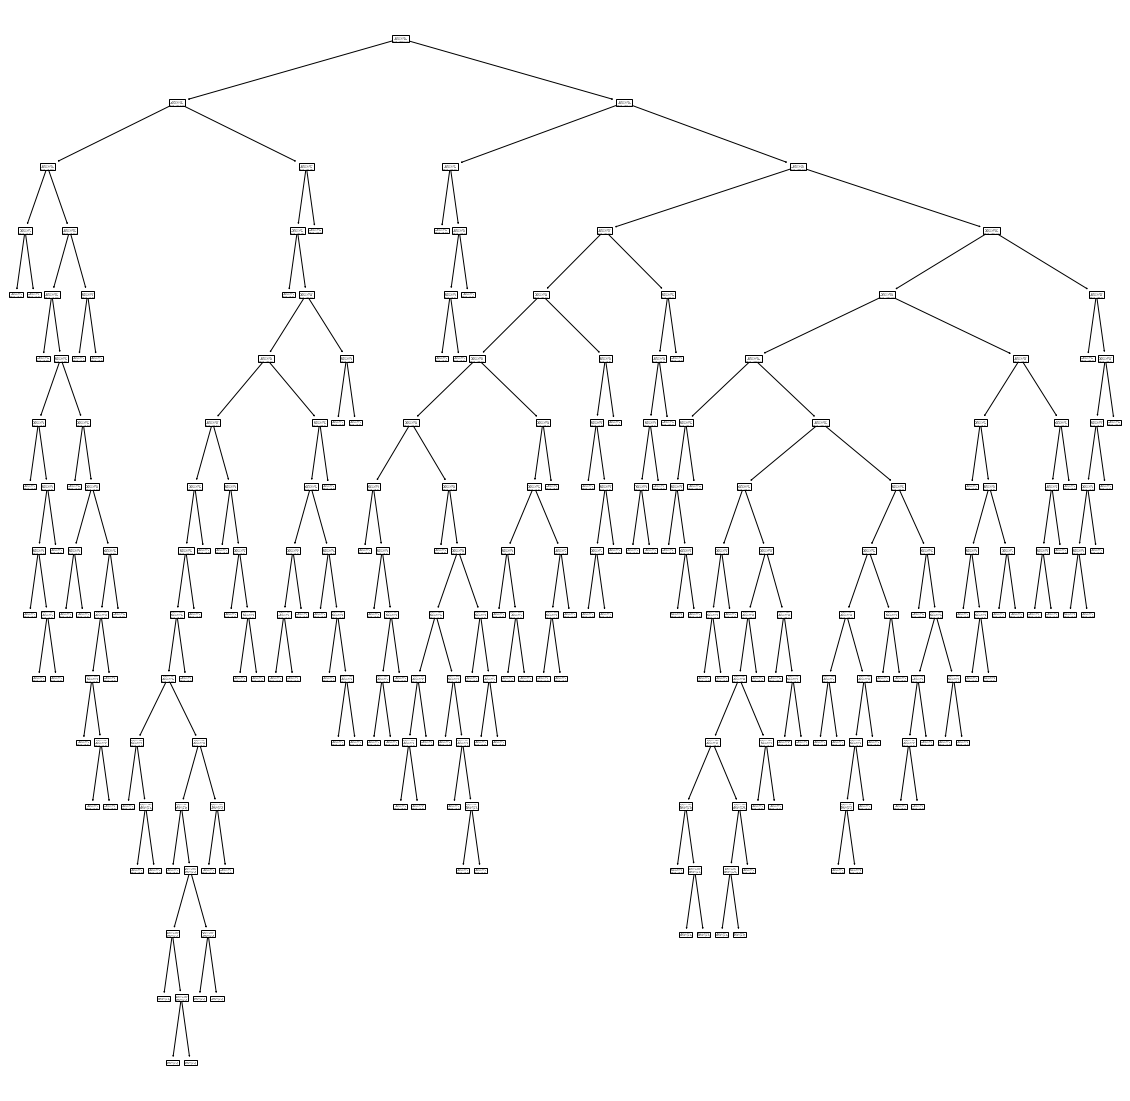

In [64]:
plt.figure(figsize = (20, 20))
tree_titanic = plot_tree(tree)
# L'arbre est trop grand (illisible) => Overfittng

In [ ]:
# Si vous êtes sur une version antérieure de sklearn, voici le code qui marche :
# Rq : Vous avez besoin d'installer le logiciel (Graphviz) et de rajouter les variables d'environnement.

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
treeG=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(Xr_train,Yb_train)
dot_data = StringIO()
export_graphviz(treeG, out_file=dot_data)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("treeOpt.png")
from IPython.display import Image
Image(filename='treeOpt.png')

In [55]:
from sklearn.tree import export_text
# tree_rules = export_text(tree, feature_names=X_train.columns.values.tolist())
# print(tree_rules)

# Q : Cmnt extraire les régles à partir d'un arbre sous la forme d'un DataFrame :
# R :
# https://stackoverflow.com/questions/56334210/how-to-extract-sklearn-decision-tree-rules-to-pandas-boolean-conditions

In [84]:
#####       		Optimisation de la profondeur de l'arbre		#####

scores=[]
for max_depth in range(2, 10) : 
    tree=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(X_train, y_train)
    score=tree.score(X_test, y_test)
    scores.append(score)

In [85]:
scores

[0.757847533632287,
 0.8071748878923767,
 0.7533632286995515,
 0.7802690582959642,
 0.7802690582959642,
 0.7668161434977578,
 0.7488789237668162,
 0.7488789237668162]

In [ ]:
# A l'aide d'un gridsearch => plusieurs params à la fois

from sklearn.model_selection import GridSearchCV
param = [{"max_depth" : list(range(2, 10))}]
grid =  GridSearchCV(DecisionTreeClassifier(), param, cv = 10, n_jobs = -1)
grid = grid.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - grid.best_score_, treeOpt.best_params_))


In [49]:
scores

[0.757847533632287,
 0.8071748878923767,
 0.7533632286995515,
 0.7802690582959642,
 0.7757847533632287,
 0.7668161434977578,
 0.7399103139013453,
 0.7488789237668162]

In [51]:
X_train.head(2)

,pclass,sex,age,sibsp,parch
512,1,1,32.5,1,0
619,2,1,18.0,0,0


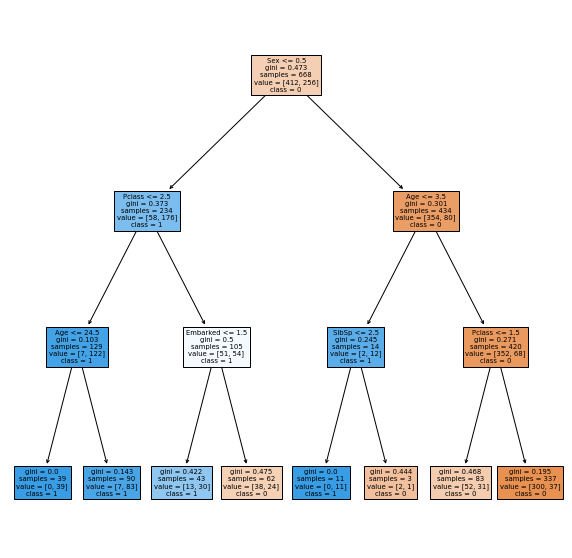

In [92]:
# Algo optimal pr les besoins du plot de l'arbre
tree=DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
plt.figure(figsize = (10, 10))
tree_titanic = plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=['0', '1'] )

# Extraire les rules

In [56]:
tree_rules = export_text(tree, feature_names=X_train.columns.values.tolist())
print(tree_rules)

|--- Sex <= 0.50
|   |--- Age <= 3.50
|   |   |--- SibSp <= 2.50
|   |   |   |--- class: 1
|   |   |--- SibSp >  2.50
|   |   |   |--- class: 0
|   |--- Age >  3.50
|   |   |--- Pclass <= 1.50
|   |   |   |--- class: 0
|   |   |--- Pclass >  1.50
|   |   |   |--- class: 0
|--- Sex >  0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 24.50
|   |   |   |--- class: 1
|   |   |--- Age >  24.50
|   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Embarked <= 1.50
|   |   |   |--- class: 1
|   |   |--- Embarked >  1.50
|   |   |   |--- class: 0



# Extraire les rules (d'une façon élègante)

In [ ]:
# https://mljar.com/blog/extract-rules-decision-tree/

# la methode pour afficher les règles
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules
